# STRUKTURA 
**1. Základní popis dat**
**2. Stanice**

2.1. Unique Start Stations
 
2.2 Unique End Stations

2.3 Stanice, které jsou pouze startovní nebo koncové
 
**3. Nejfrekventovanější stanice**
 
3.1 TOP 10 start station
 
3.2 TOP 10 end station
 
3.3 TOP 10 Stations celkem
 
3.4 Nejpopulárnější cesty

**4. Aktivni vs neaktivni stanice**

**5. Stanice, na kterých se kola hromadí a stanice, kde potenciálně chybí**

5.1  stanice, kde kola potenciálně chybí

5.2  stanice, kde se kola hromadí

5.3 Denní průběh u stanic, kde kola chybí nebo se hromadí

5.3.1 Denní průběh u TOP 10 stanice, kde kola chybi

5.3.2  Denní průběh u TOP 10 stanice, kde se kola hromadí

5.3.3 Denní průběh u jednotlivých stanic

**6. Vzdálenosti mezi jednotlivými stanicemi**

**7. Jak dlouho trvá jedna výpůjčka?**

**8. Vývoj poptávky po půjčování kol v čase**

8.1 Vývoj denní poptávky

8.2 Vývoj měsiční poptávky

**9. Vliv počasí**

9.1 Příklad vlivu počasí v lednu 2020

9.2 Příklad vlivu počasí v červenci 2020

**10. Závěr**

In [5]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from sklearn.neighbors import DistanceMetric
from math import radians

In [6]:
with zipfile.ZipFile("data_edinburgh.zip", 'r') as zip_ref:
    zip_ref.extractall("data_edinburgh")

In [7]:
df = pd.read_csv('data_edinburgh/edinburgh_bikes.csv',parse_dates=True)
df.head()

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646


In [8]:
#Kontrola data type u hlavní df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340986 entries, 0 to 340985
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      340986 non-null  int64  
 1   started_at                 340986 non-null  object 
 2   ended_at                   340986 non-null  object 
 3   duration                   340986 non-null  int64  
 4   start_station_id           340986 non-null  int64  
 5   start_station_name         340986 non-null  object 
 6   start_station_description  338142 non-null  object 
 7   start_station_latitude     340986 non-null  float64
 8   start_station_longitude    340986 non-null  float64
 9   end_station_id             340986 non-null  int64  
 10  end_station_name           340986 non-null  object 
 11  end_station_description    337891 non-null  object 
 12  end_station_latitude       340986 non-null  float64
 13  end_station_longitude      34

In [9]:
# Date Time data se nezmenila, tak pouzijeme to_datetime
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])


In [10]:
# Podívám se, zda nejsou nulové hodnoty u hlavni DF. 
# Nulové hodnoty jsou ve sloupcích, které nejsou podstatné, tak je to OK.
df.isna().sum()

index                           0
started_at                      0
ended_at                        0
duration                        0
start_station_id                0
start_station_name              0
start_station_description    2844
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_description      3095
end_station_latitude            0
end_station_longitude           0
dtype: int64

In [11]:
#Pomocí describe zjistíme základní statistické údaje 
df.describe(include='all')

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
count,340986.000000,340986,340986,3.409860e+05,340986.000000,340986,338142,340986.000000,340986.000000,340986.000000,340986,337891,340986.000000,340986.000000
unique,NaN,336209,336019,NaN,NaN,169,207,NaN,NaN,NaN,170,208,NaN,NaN
top,NaN,2020-07-20 14:02:30,2020-07-20 14:55:44,NaN,NaN,Meadows East,"Bristo Square, near Potterrow",NaN,NaN,NaN,Victoria Quay,Entrance to Scottish Government Office,NaN,NaN
freq,NaN,24,24,NaN,NaN,12715,10947,NaN,NaN,NaN,11479,11479,NaN,NaN
first,NaN,2018-09-15 08:52:05,2018-09-15 09:11:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-10-30 23:51:25,2020-10-30 23:58:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9383.824186,NaN,NaN,2.061247e+03,873.602186,NaN,NaN,55.950954,-3.197067,912.859499,NaN,NaN,55.952805,-3.196056
std,7516.833478,NaN,NaN,8.703688e+03,657.828175,NaN,NaN,0.013604,0.039233,664.571468,NaN,NaN,0.016303,0.041459
min,0.000000,NaN,NaN,6.100000e+01,171.000000,NaN,NaN,55.908404,-3.407156,171.000000,NaN,NaN,53.395525,-3.407156
25%,3320.000000,NaN,NaN,6.200000e+02,259.000000,NaN,NaN,55.940238,-3.207964,262.000000,NaN,NaN,55.941791,-3.208070


# 1 Základní popis dat
Počet řadků je 340 986, tj. 340 986 cest.
Data jsou z obdoní od 2018-09-15 do 2020-10-30.

Průměrna cesta trvala 2 061 sekund, tj. 34 minut a 21 sekund
Median trvání cesty však je přibližně poloviční - 1 147 sekund, tj. 19 minut a 7 sekund

Minimální trvání jedné cesty bylo 61 sekund. Může se jednat o zkoušku uživatele, zda mu služba funguje. 

Maximální trvání jedné cesty bylo 1 373 043 sekund, tj. přes 381 hodin, což zřejmě jde o omyl. Může se jednat o kradené kolo.
Další údaj, který vypovidá o omyl v maximální hodnotě trvání cest je 75. percentilem. Podle něj 75 % cest trvalo 2 512 sekund, tj. 41 minut a 52 sekund.

# 2 Stanice

## 2.1 Unique Start Stations

**Je 198 různých stanic odjezdu.
Nejpopulárnější je stanice číslo 265.**

In [12]:
# Unique Start Stations
df_unique_start = pd.DataFrame(data=df['start_station_id'].unique(), columns=['start_station_id'])
df_unique_start = df_unique_start.merge(df['start_station_id'].value_counts(), left_on='start_station_id', right_index=True)
df_unique_start.rename(columns={'start_station_id_y' : 'frequency'}, inplace=True)
df_unique_start.drop(columns=['start_station_id_x'], inplace=True)
df_unique_start.sort_values('frequency', inplace=True)
df_unique_start

,start_station_id,frequency
182,1857,1
143,1740,1
25,241,2
118,1057,2
101,299,3
...,...,...
137,1728,8036
17,250,8140
1,259,10372
16,248,10999


In [13]:
#Na základě předchozí df, přidám dodatečné informace o jednotlivých stanicích a jejich frekvence. 
# Důvod, proč jsem tento df vytvořila byl, že jsem to původně chtěla zobrazit na mapě.
#Použila jsem drop_duplicate, protože jinak se mi některé stanice zobrazily vícekrát, neboť i když bylo číslo stanice stejné
# se popis nebo název stanice lišily, nebo dokonce nesouhlasily latitude/longitude o poslední číslici.
df_st_stations = df.loc[:,['start_station_id','start_station_name','start_station_description','start_station_latitude','start_station_longitude']]
df_st_stations.drop_duplicates(subset='start_station_id', inplace=True)
df_st_stations_freq = df_st_stations.merge(df_unique_start)
df_st_stations_freq.sort_values('frequency', inplace=True)
df_st_stations_freq

,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,frequency
182,1857,City Chambers Launch Station,Temporary station at City Chambers,55.950222,-3.190270,1
143,1740,Cycling Scotland Conference,Murrayfield Stadium,55.940886,-3.240778,1
25,241,Depot,Depot,55.972373,-3.155833,2
118,1057,Pleasance - Edinburgh University Sports Fair,Pleasance Sports Complex,55.948210,-3.181597,2
101,299,Depot Virtual,Depot internal station,55.972335,-3.155782,3
...,...,...,...,...,...,...
137,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,8036
17,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,8140
1,259,St Andrew Square,North East corner,55.954749,-3.192774,10372
16,248,Bristo Square,"Bristo Square, near Potter Row",55.946004,-3.188665,10999


## 2.2 Unique End Stations

**Je 199 stanic prijezdu. Nejpopularnejsi je 250**

In [14]:
df_unique_end = pd.DataFrame(data=df['end_station_id'].unique(), columns=['end_station_id'])
df_unique_end = df_unique_end.merge(df['end_station_id'].value_counts(), left_on='end_station_id', right_index=True)
df_unique_end.rename(columns={'end_station_id_y' : 'frequency'}, inplace=True)
df_unique_end.drop(columns=['end_station_id_x'], inplace=True)
df_unique_end.sort_values('frequency', inplace=True)

df_unique_end

,end_station_id,frequency
33,242,2
145,1740,2
57,280,3
25,241,3
141,299,5
...,...,...
44,358,9326
1,262,9482
138,1728,10091
8,265,11371


In [15]:
# Opět, původní plán to bylo zobrazit na mapě. Proto jsem přidala další info o stanicích.
df_end_stations = df.loc[:,['end_station_id','end_station_name','end_station_description','end_station_latitude','end_station_longitude']].drop_duplicates(subset='end_station_id')
df_end_stations_freq = df_end_stations.merge(df_unique_end)
df_end_stations_freq.sort_values('frequency', inplace=True)
df_end_stations_freq

,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,frequency
33,242,Virtual Depot,Virtual Depot,55.972402,-3.155794,2
145,1740,Cycling Scotland Conference,Murrayfield Stadium,55.940886,-3.240778,2
57,280,Smarter Travel Station,The Street,53.395525,-2.990138,3
25,241,Depot,Depot,55.972373,-3.155833,3
141,299,Depot Virtual,Depot internal station,55.972335,-3.155782,5
...,...,...,...,...,...,...
44,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,9326
1,262,Canonmills,near Tesco's,55.962804,-3.196284,9482
138,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,10091
8,265,Meadows East,Melville Terrace,55.939809,-3.182739,11371


**Počet stanic v dataframech z bodů 2.1 a 2.2 se liší. Z toho plyne, že existuje možnost, že některé stanice se nachází jen v jednom z dataframů.**

## 2.3 Stanice, které jsou pouze startovní nebo koncové

In [16]:
#Ze serií 'start_station_id' a 'end_station_id', vytvořím listy.
# Pomocí for cyklus procházím prvky listy.

startunique=list(df['start_station_id'].unique())
endunique=list(df['end_station_id'].unique())

onlyinstart = []
onlyinend = []

for i in startunique:
    if i not in endunique:
        onlyinstart.append(i)

for i in endunique:
    if i not in startunique:
        onlyinend.append(i)
    


print('Only appears on start: ', onlyinstart, '\n','Only appears on end: ', onlyinend)

Only appears on start:  [1857] 
 Only appears on end:  [242, 280]


**Z předchozího vychází, že stanice 1857 byla použita pouze jako startovní a stanice 242 a 280 pouze jako koncová. Celkem je 200 stanic**

In [17]:
# Zjistíme frekvence použití pro stanice, které byly použity jen v jednom směru
df_unique_start[df_unique_start['start_station_id'] == 1857]

,start_station_id,frequency
182,1857,1


In [18]:
# Zjistíme frekvence použití pro stanice, které byly použity jen v jednom směru
df_unique_end[df_unique_end['end_station_id'].isin([242,280])]

,end_station_id,frequency
33,242,2
57,280,3


**Frekvence použití těchto stanic je nevyznamná**

# 3 Nejfrekventovanější stanice 

## 3.1 TOP 10 start station

In [19]:
df_st_stations_freq.sort_values('frequency', ascending = False).head(10)

,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,frequency
9,265,Meadows East,Melville Terrace,55.939809,-3.182739,12715
16,248,Bristo Square,"Bristo Square, near Potter Row",55.946004,-3.188665,10999
1,259,St Andrew Square,North East corner,55.954749,-3.192774,10372
17,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,8140
137,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,8036
31,289,Castle Street,Near Rose Street,55.951501,-3.203184,7628
2,262,Canonmills,near Tesco's,55.962804,-3.196284,7589
98,1024,Meadow Place 2,NaN,55.940238,-3.194640,7582
18,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248,7081
0,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,6834


## 3.2 TOP 10 end station

In [20]:
df_end_stations_freq.sort_values('frequency', ascending = False).head(10)

,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,frequency
2,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116,11479
8,265,Meadows East,Melville Terrace,55.939809,-3.182739,11371
138,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,10091
1,262,Canonmills,near Tesco's,55.962804,-3.196284,9482
44,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,9326
180,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395,7961
30,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351,6991
0,259,St Andrew Square,North East corner,55.954728,-3.192653,6943
10,258,Stockbridge,Hamilton Place by Dean Bank Lane,55.958566,-3.208070,6779
9,248,Bristo Square,"Bristo Square, near Potter Row",55.946004,-3.188665,6672


## 3.3 TOP 10 Stations celkem

In [21]:
#Spojuji obě základní tabulky o frekvencích df_unique_start a df_unique_end.
# Udělám to pomocí outer join tak, aby df zahrnoval i stanice, které jsou pouze v jednom směru. 
df_hromady = df_unique_start.merge(df_unique_end, left_on='start_station_id', right_on='end_station_id', how='outer').rename(columns = {'frequency_x':'frequency_start', 'frequency_y':'frequency_end', 'start_station_id' : 'station_id'})

#vyplňuji null values 
df_hromady.fillna({'frequency_start' : 0, 'frequency_end' : 0}, inplace=True)

# Mám nulové hodnoty ještě ve sloupci station id (původně start_station_id), neboť dvě stanice jsou přitomné pouze jako end station.
# Jsou to jen dvě hodnoty, tak to zapisuji manuálně
df_hromady['station_id'].iloc[198]=242
df_hromady['station_id'].iloc[199]=280

#Odstraním sloupec 'end_station_id'  
df_hromady.drop(columns='end_station_id', inplace=True)

#sčítám frekvence startu a konce
df_hromady['frequency_total'] = df_hromady['frequency_start'] + df_hromady['frequency_end']

#Cambio el data type
df_hromady = df_hromady.astype(dtype='int64').sort_values('frequency_total', ascending = False)
df_hromady.head(10)


,station_id,frequency_start,frequency_end,frequency_total
197,265,12715,11371,24086
194,250,8140,11479,19619
193,1728,8036,10091,18127
196,248,10999,6672,17671
195,259,10372,6943,17315
191,262,7589,9482,17071
186,358,6554,9326,15880
190,1024,7582,6127,13709
192,289,7628,6029,13657
184,1824,5617,7961,13578


## 3.4 Nejpopulárnější cesty

In [22]:
# Z hlavní df, přeměním 'start_station_id' a 'end_station_id' do stringu a spojuji je pomocí "-". Takto získám cestu.
df_trips = df['start_station_id'].map(str) + '-' + df['end_station_id'].map(str)

# pomocí value_counts zjistim nejčastější cesty.
df_trips.value_counts().head(10)

1728-1728    2431
1722-1722    2189
1824-1824    2065
257-257      1778
250-250      1578
262-262      1477
265-265      1333
285-285      1296
358-358      1147
1800-1800    1062
dtype: int64

**Nej popularnější jsou cesty, kde startovní a koncová stanice jsou stejné. 
Velmi pravděpodobně se bude jednat o rekreační okružní cesty.**

In [23]:
#Jen pro zábavu můžeme filtrovat všechny cesty, kde startovní a koncové stanice jsou stejné
condition = df['start_station_id'] == df['end_station_id']
df[condition]

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
9,9,2018-09-16 12:50:17,2018-09-16 12:51:30,72,264,Pollock Halls,Pollock Halls Entrance,55.939963,-3.171586,264,Pollock Halls,Pollock Halls Entrance,55.939963,-3.171586
14,14,2018-09-17 08:03:26,2018-09-17 08:08:32,305,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
15,15,2018-09-17 08:05:10,2018-09-17 08:06:30,79,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
16,16,2018-09-17 08:08:56,2018-09-17 08:25:00,963,257,Portobello,Edinburgh Leisure Tumbles Centre,55.957004,-3.116888,257,Portobello,Edinburgh Leisure Tumbles Centre,55.957004,-3.116888
17,17,2018-09-17 08:13:41,2018-09-17 08:17:08,206,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340955,19348,2020-10-30 22:17:38,2020-10-30 22:33:30,951,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682
340973,19366,2020-10-30 22:41:16,2020-10-30 22:42:27,71,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682
340978,19371,2020-10-30 23:14:21,2020-10-30 23:44:49,1827,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101
340979,19372,2020-10-30 23:15:27,2020-10-30 23:45:11,1784,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101


**Z df lze vyčíst, že z celkových 340 986 cest 50 788 bylo okružních, tj. 6,7 %**

# 4 Aktivni vs neaktivni stanice

In [24]:
# Podívám se na základní popisná data o celkovém použití stanic. Jde o sčitání frekvence startu a konce.
df_hromady['frequency_total'].describe()

count      200.000000
mean      3409.860000
std       4337.953375
min          1.000000
25%        380.750000
50%       1898.500000
75%       4490.000000
max      24086.000000
Name: frequency_total, dtype: float64

**Můžeme používat 25. percentil a nastavit, že stanice u kterých je frekvence nižší než 380,75 jsou neaktivní**

In [25]:
mask_inactive = df_hromady['frequency_total'] < 380.75
df_hromady[mask_inactive].count()

station_id         50
frequency_start    50
frequency_end      50
frequency_total    50
dtype: int64

**Ze 200 stanic 50 lze považovat za neaktivní. Zde je vypis**

In [26]:
df_hromady[mask_inactive]

,station_id,frequency_start,frequency_end,frequency_total
44,2263,167,213,380
47,860,186,173,359
52,342,243,106,349
45,1874,169,151,320
43,1877,140,148,288
39,1860,110,170,280
42,874,135,129,264
36,1041,101,160,261
40,869,116,139,255
37,880,105,135,240


# 5 Stanice, na kterých se kola hromadí a stanice, kde potenciálně chybí

In [27]:
# Kde se kola hromadí: frekvence end station – frekvence start station. 
# Čím větší rozdíl, tím větší hromaždění.

#Přidám sloupec, který uvede rozdíl mezi frekvencemi. 
# Pozitivní číslo znamená, že se na dané stanici spíše kola shromažďují
# Negativní číslo znamená, že na dané stanici spíše kola chybí
df_hromady['hromadise_chybi'] = df_hromady['frequency_end'] - df_hromady['frequency_start']

## 5.1  stanice, kde kola potenciálně chybí

In [28]:
station_missing = df_hromady[['station_id','hromadise_chybi']].astype(dtype='int64').sort_values('hromadise_chybi').head(10)
station_missing

,station_id,hromadise_chybi
196,248,-4327
195,259,-3429
188,247,-2586
177,189,-2382
180,260,-2204
176,1767,-1605
192,289,-1599
185,264,-1473
190,1024,-1455
197,265,-1344


In [29]:
station_missing_list = list(station_missing['station_id'])
station_missing_list

[248, 259, 247, 189, 260, 1767, 289, 264, 1024, 265]

## 5.2  stanice, kde se kola hromadí

In [30]:
station_accu = df_hromady[['station_id','hromadise_chybi']].astype(dtype='int64').sort_values('hromadise_chybi', ascending = False).head(10)
station_accu

,station_id,hromadise_chybi
194,250,3339
186,358,2772
184,1824,2344
193,1728,2055
191,262,1893
181,285,1755
179,258,1707
173,257,1212
136,366,1070
121,820,867


In [31]:
station_accu_list = list(station_accu['station_id'])
station_accu_list

[250, 358, 1824, 1728, 262, 285, 258, 257, 366, 820]

## 5.3 Denní průběh u stanic, kde kola chybí nebo se hromadí

In [32]:
# Počítám denní frekvenci u startovacích stanic
df_daily_freq = df[['started_at','start_station_id']]
df_daily_freq.index=df_daily_freq['started_at']
# Použiji resample 
df_daily_freq = df_daily_freq.groupby('start_station_id').resample('D').count().drop(columns='started_at').rename(columns={'start_station_id':'start_frequency'})
df_daily_freq.index.rename('station_id', level=0, inplace=True)
df_daily_freq

start_frequency
station_id started_at                 
171        2018-09-17               35
           2018-09-18                1
           2018-09-19                5
           2018-09-20                1
           2018-09-21                7
...                                ...
2268       2020-10-26                8
           2020-10-27                8
           2020-10-28               16
           2020-10-29               11
           2020-10-30               10

[59163 rows x 1 columns]

In [33]:
# Počítám denní frekvenci u přijezdových stanic
df_daily_freq_end = df[['started_at','end_station_id']]
df_daily_freq_end.index=df_daily_freq_end['started_at']
df_daily_freq_end = df_daily_freq_end.groupby('end_station_id').resample('D').count().drop(columns='started_at').rename(columns={'end_station_id':'end_frequency'})
df_daily_freq_end.index.rename('station_id', level=0, inplace=True)
df_daily_freq_end


end_frequency
station_id started_at               
171        2018-09-17             18
           2018-09-18              3
           2018-09-19              5
           2018-09-20              6
           2018-09-21              5
...                              ...
2268       2020-10-26              7
           2020-10-27              4
           2020-10-28              9
           2020-10-29              6
           2020-10-30             10

[59306 rows x 1 columns]

In [34]:
#Spojuji oba df a počítám rozdíly.
#Když je hodnota záporná, v dané stanici potenciálně chybí kola. 
#Když je hodnota kladná, v dané stanici se kola hromadí
df_daily_freq_diff = df_daily_freq.merge(df_daily_freq_end, left_index=True, right_index=True, how='outer')
#Tím, že jsme použili outer u některých hodnot vznikly nulové hodnoty. 
df_daily_freq_diff.isnull().sum()

start_frequency    287
end_frequency      144
dtype: int64

In [35]:
#Nulové hodnoty spravíme tak, že pokud o startu nebo endu je NA, nahradíme nulou. 
df_daily_freq_diff[['start_frequency','end_frequency']] = df_daily_freq_diff[['start_frequency','end_frequency']].fillna(value=0)
df_daily_freq_diff.isnull().sum()

start_frequency    0
end_frequency      0
dtype: int64

In [36]:
# Pridame sloupec s rozdílem .
df_daily_freq_diff['hromadise_chybi'] = df_daily_freq_diff['end_frequency'] - df_daily_freq_diff['start_frequency']

### 5.3.1 Denní průběh u TOP 10 stanice, kde kola chybi

In [37]:
#Filtruji TOP 10 stanice, kde kola chybi
df_miss_accu = df_daily_freq_diff.reset_index(level = 0)
mask_missing = df_miss_accu['station_id'].isin(station_missing_list)
df_missing = df_miss_accu[mask_missing]
df_missing

,station_id,start_frequency,end_frequency,hromadise_chybi
started_at,,,,
2018-09-17,189,35.0,22.0,-13.0
2018-09-18,189,2.0,3.0,1.0
2018-09-19,189,1.0,0.0,-1.0
2018-09-20,189,5.0,3.0,-2.0
2018-09-21,189,2.0,3.0,1.0
...,...,...,...,...
2020-10-26,1767,13.0,8.0,-5.0
2020-10-27,1767,11.0,10.0,-1.0
2020-10-28,1767,24.0,11.0,-13.0


In [38]:
#vytvorim df s agregacnimi daty pro stanice, kde kola potencialne chybi
df_missing_agg = df_missing.loc[:,['station_id','hromadise_chybi']].groupby('station_id').agg({'hromadise_chybi':['describe','sum']}).round(2)
df_missing_agg

hromadise_chybi                                         \
                  describe                                          
                     count  mean   std   min  25%  50%  75%   max   
station_id                                                          
189                  775.0 -3.07  3.33 -17.0 -5.0 -3.0 -1.0  10.0   
247                  777.0 -3.33  3.75 -22.0 -6.0 -3.0 -1.0   8.0   
248                  776.0 -5.58  5.59 -42.0 -9.0 -5.0 -1.0  10.0   
259                  777.0 -4.41  4.45 -27.0 -7.0 -4.0 -1.0  17.0   
260                  775.0 -2.84  3.10 -16.0 -5.0 -2.0  0.0   8.0   
264                  776.0 -1.90  3.73 -19.0 -3.0 -1.0  0.0   8.0   
265                  776.0 -1.73  4.09 -19.0 -4.0 -1.0  1.0  10.0   
289                  737.0 -2.17  4.42 -24.0 -4.0 -1.0  1.0  11.0   
1024                 459.0 -3.17  4.65 -19.0 -6.0 -3.0  0.0  10.0   
1767                 324.0 -4.95  4.51 -18.0 -8.0 -5.0 -2.0  13.0   

                            
                       sum  
           hromadise_chybi  
station_id                  
189                -2382.0  
247                -2586.0  
248                -4327.0  
259                -3429.0  
260                -2204.0  
264                -1473.0  
265                -1344.0  
289                -1599.0  
1024               -1455.0  
1767               -1605.0

**Median a průměr nejsou až tak rozdilné, což může naznačit, že neexistují odlehlé hodnoty. I když v obou případech jsou denní hodnoty záporné, tj. existuje riziko, že kola během dne chybí, čísla obecně se nejeví jako dramatické.**

**Nejhůř na tom jsou stanice 248 a 259.**

**Stanice 1024 a 1767 také nevykazují nejlepší hodnoty, ale podle ukazatele count, nejsou využivány tak často, jako další stanice.**

**Stanice 265 je nejpopulárnější stanice podle bodu 3.3
248, 259, 1024 a 289 jsou také v rámci TOP 10 nejpopulárnějších stanic.**

**Zajimavé zde je, že stanice 1024 je v rámci TOP 10 nejpopulárnějších, co se týče počtu jízd, ale není použita každý den.**

### 5.3.2  Denní průběh u TOP 10 stanice, kde se kola hromadí

In [39]:
#Filtruji TOP 10 stanice, kde se kola hroamdí
mask_accu = df_miss_accu['station_id'].isin(station_accu_list)
df_accu = df_miss_accu[mask_accu]
df_accu

,station_id,start_frequency,end_frequency,hromadise_chybi
started_at,,,,
2018-09-15,250,0.0,1.0,1.0
2018-09-16,250,0.0,0.0,0.0
2018-09-17,250,14.0,22.0,8.0
2018-09-18,250,12.0,14.0,2.0
2018-09-19,250,3.0,6.0,3.0
...,...,...,...,...
2020-10-26,1824,7.0,13.0,6.0
2020-10-27,1824,5.0,15.0,10.0
2020-10-28,1824,7.0,21.0,14.0


In [40]:
#Vytvoříme df s agregacnimi daty
df_accu_agg = df_accu.loc[:,['station_id','hromadise_chybi']].groupby('station_id').agg({'hromadise_chybi':['describe','sum']}).round(2)
df_accu_agg

hromadise_chybi                                          \
                  describe                                           
                     count  mean   std   min  25%  50%   75%   max   
station_id                                                           
250                  777.0  4.30  4.68  -6.0  1.0  4.0   6.0  32.0   
257                  381.0  3.18  4.24  -5.0  1.0  2.0   5.0  29.0   
258                  775.0  2.20  3.19  -7.0  0.0  2.0   4.0  16.0   
262                  777.0  2.44  3.72 -18.0  0.0  2.0   5.0  13.0   
285                  744.0  2.36  3.45 -17.0  0.0  2.0   4.0  26.0   
358                  689.0  4.02  4.33  -9.0  1.0  4.0   7.0  35.0   
366                  258.0  4.15  4.15  -7.0  1.0  4.0   6.0  20.0   
820                  125.0  6.94  4.66  -8.0  4.0  7.0  10.0  18.0   
1728                 373.0  5.51  9.14  -8.0  1.0  3.0   8.0  86.0   
1824                 268.0  8.75  6.05  -3.0  4.0  8.0  13.0  31.0   

                            
                       sum  
           hromadise_chybi  
station_id                  
250                 3339.0  
257                 1212.0  
258                 1707.0  
262                 1893.0  
285                 1755.0  
358                 2772.0  
366                 1070.0  
820                  867.0  
1728                2055.0  
1824                2344.0

**Specifika u těchto stanic oproti předchozím spočívá v tom, že jen u 4 existuje více než 700 záznamů, což indikuje, že u dalších stanic, sice se kola hromadí, ale ne každý den, neboť nejsou použivané s denní frekvencí.**

**Stanice 250 je druhá nejpopulárnější podle bodu 3.3.
Stanice 1728, 262, 358 a 1824 jsou také v rámci TOP 10**

### 5.3.3 Denní průběh u jednotlivých stanic

In [41]:
#Zjistime u všech 200 stanic, jak to vypadá každý den
df_agg = df_miss_accu.loc[:,['station_id','hromadise_chybi']].groupby('station_id').agg({'hromadise_chybi':['describe','sum']}).round(2)
#Třidím podle průměru.
df_agg.sort_values([('hromadise_chybi','describe','mean')])

hromadise_chybi                                          \
                  describe                                           
                     count  mean   std   min  25%  50%   75%   max   
station_id                                                           
248                  776.0 -5.58  5.59 -42.0 -9.0 -5.0  -1.0  10.0   
1094                   1.0 -5.00   NaN  -5.0 -5.0 -5.0  -5.0  -5.0   
1767                 324.0 -4.95  4.51 -18.0 -8.0 -5.0  -2.0  13.0   
259                  777.0 -4.41  4.45 -27.0 -7.0 -4.0  -1.0  17.0   
247                  777.0 -3.33  3.75 -22.0 -6.0 -3.0  -1.0   8.0   
...                    ...   ...   ...   ...  ...  ...   ...   ...   
250                  777.0  4.30  4.68  -6.0  1.0  4.0   6.0  32.0   
1728                 373.0  5.51  9.14  -8.0  1.0  3.0   8.0  86.0   
820                  125.0  6.94  4.66  -8.0  4.0  7.0  10.0  18.0   
1026                 118.0  7.04  4.59  -1.0  3.0  7.0  10.0  19.0   
1824                 268.0  8.75  6.05  -3.0  4.0  8.0  13.0  31.0   

                            
                       sum  
           hromadise_chybi  
station_id                  
248                -4327.0  
1094                  -5.0  
1767               -1605.0  
259                -3429.0  
247                -2586.0  
...                    ...  
250                 3339.0  
1728                2055.0  
820                  867.0  
1026                 831.0  
1824                2344.0  

[200 rows x 9 columns]

In [42]:
#Zjistime u všech 200 stanic, jak to vypadalo každý den v roce 2020
df_agg = df_miss_accu.loc['2020-01-01':'2020-10-30',['station_id','hromadise_chybi']].groupby('station_id').agg({'hromadise_chybi':['describe','sum']}).round(2)
#Třidím podle průměru.
df_agg.sort_values([('hromadise_chybi','describe','mean')])

hromadise_chybi                                           \
                  describe                                            
                     count  mean   std   min   25%  50%   75%   max   
station_id                                                            
1767                 304.0 -5.12  4.57 -18.0 -8.00 -5.0  -2.0  13.0   
248                  304.0 -4.90  5.04 -27.0 -8.00 -4.0  -1.0   4.0   
247                  304.0 -4.34  3.85 -22.0 -6.25 -4.0  -2.0   7.0   
259                  304.0 -4.00  3.93 -16.0 -7.00 -4.0  -1.0  17.0   
1024                 304.0 -3.79  4.81 -19.0 -7.00 -3.0   0.0  10.0   
...                    ...   ...   ...   ...   ...  ...   ...   ...   
1095                  73.0  3.44  2.74  -3.0  1.00  4.0   5.0  10.0   
358                  304.0  4.48  4.82  -9.0  1.00  4.0   7.0  35.0   
250                  304.0  5.22  5.80  -6.0  2.00  4.0   8.0  32.0   
1728                 304.0  6.36  9.87  -8.0  1.00  4.0   9.0  86.0   
1824                 268.0  8.75  6.05  -3.0  4.00  8.0  13.0  31.0   

                            
                       sum  
           hromadise_chybi  
station_id                  
1767               -1556.0  
248                -1489.0  
247                -1320.0  
259                -1215.0  
1024               -1151.0  
...                    ...  
1095                 251.0  
358                 1361.0  
250                 1587.0  
1728                1933.0  
1824                2344.0  

[119 rows x 9 columns]

**Když se podíváme na denní průměr u jednotlivých stanic, vidíme, že hodnoty nejsou přiliš odlišných od těch z nejpopulárnějších stanic. Jinými slovy, problém hromáždění nebo nedostatku kol u dalších stanic není horší než u nejpopulárnějších. 
Zároveň, když studujeme čísla pouze pro rok 2020, zjistíme, že nejsou tak odlišné jako od celého období, což lze interpretovat tak, že se situace nezhoršila větší poptávkou, neboť jak se uvidí níže poptávka po kolech byla v roce 2020 vyšší**

# 6. Vzdálenosti mezi jednotlivými stanicemi

In [43]:
#Creo DF con todas las estaciones
df_all_stations = df_st_stations.merge(df_end_stations, left_on = 'start_station_id', right_on = 'end_station_id', how='outer')
#Acomodo los missing data
df_all_stations['start_station_id'].iloc[198]=242
df_all_stations['start_station_id'].iloc[199]=280
df_all_stations['start_station_name'].iloc[198]='Virtual Depot'
df_all_stations['start_station_name'].iloc[199]='Smarter Travel Station'
df_all_stations['start_station_latitude'].iloc[198]=55.972402
df_all_stations['start_station_latitude'].iloc[199]=53.395525
df_all_stations['start_station_longitude'].iloc[198]=-3.155794
df_all_stations['start_station_longitude'].iloc[199]=-2.990138

df_all_stations2 = df_all_stations.drop(columns = {'start_station_description','end_station_id','end_station_name','end_station_description','end_station_latitude','end_station_longitude'}).rename(columns = {'start_station_id' : 'station_id', 'start_station_name' : 'station_name', 'start_station_latitude' : 'station_latitude', 'start_station_longitude':'station_longitude'})
df_all_stations2

C:\Users\Mariana\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,station_id,station_name,station_latitude,station_longitude
0,247.0,Charlotte Square,55.952335,-3.207101
1,259.0,St Andrew Square,55.954749,-3.192774
2,262.0,Canonmills,55.962804,-3.196284
3,255.0,Kings Buildings 4,55.922001,-3.176902
4,253.0,Kings Building 2,55.923202,-3.171646
...,...,...,...,...
195,2263.0,Musselburgh Lidl,55.943880,-3.066754
196,2265.0,Musselburgh Brunton Hall,55.944009,-3.058493
197,2268.0,Picady Place,55.956535,-3.186248
198,242.0,Virtual Depot,55.972402,-3.155794


In [44]:
#Výpočet jsem udělala pomoci následujícího tutorialu
#https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/

#Convert the Lat/Long degress in Radians
df_all_stations2['station_latitude'] = np.radians(df_all_stations2['station_latitude'])
df_all_stations2['station_longitude'] = np.radians(df_all_stations2['station_longitude'])
df_all_stations2

,station_id,station_name,station_latitude,station_longitude
0,247.0,Charlotte Square,0.976552,-0.055974
1,259.0,St Andrew Square,0.976595,-0.055724
2,262.0,Canonmills,0.976735,-0.055786
3,255.0,Kings Buildings 4,0.976023,-0.055447
4,253.0,Kings Building 2,0.976044,-0.055356
...,...,...,...,...
195,2263.0,Musselburgh Lidl,0.976405,-0.053525
196,2265.0,Musselburgh Brunton Hall,0.976407,-0.053381
197,2268.0,Picady Place,0.976626,-0.055611
198,242.0,Virtual Depot,0.976903,-0.055079


In [45]:
#Scipy get_metrics()
dist = DistanceMetric.get_metric('haversine')
#Scipy Pairwise()
df_all_stations2[['station_latitude','station_longitude']].to_numpy()

array([[ 0.97655248, -0.05597447],
       [ 0.9765946 , -0.05572441],
       [ 0.97673519, -0.05578567],
       [ 0.97602304, -0.0554474 ],
       [ 0.97604401, -0.05535567],
       [ 0.97606117, -0.0553938 ],
       [ 0.97604883, -0.05542092],
       [ 0.97633655, -0.05535462],
       [ 0.97631973, -0.05539542],
       [ 0.97633386, -0.05554927],
       [ 0.97653518, -0.0557008 ],
       [ 0.97651362, -0.0556805 ],
       [ 0.97663396, -0.05439996],
       [ 0.97638171, -0.0557001 ],
       [ 0.97670248, -0.05551902],
       [ 0.97639101, -0.05564653],
       [ 0.97644198, -0.05565271],
       [ 0.97699409, -0.05539877],
       [ 0.97639577, -0.05601194],
       [ 0.97654199, -0.0555744 ],
       [ 0.97642046, -0.05580282],
       [ 0.97655781, -0.05563284],
       [ 0.97666121, -0.05599139],
       [ 0.97693491, -0.05575423],
       [ 0.97656694, -0.05553083],
       [ 0.9769022 , -0.05507968],
       [ 0.97673053, -0.05549227],
       [ 0.97642724, -0.05591473],
       [ 0.9766776 ,

In [46]:
#We will pass this ndarray in pairwise() function which returns the ouput as ndarray too
dist.pairwise(df_all_stations2[['station_latitude','station_longitude']].to_numpy())*6373

array([[  0.        ,   0.93173289,   1.34521127, ...,   1.38006428,
          3.89688803, 284.73534478],
       [  0.93173289,   0.        ,   0.92225533, ...,   0.45235795,
          3.02588638, 284.95986018],
       [  1.34521127,   0.92225533,   0.        , ...,   0.93630964,
          2.73728592, 285.86521887],
       ...,
       [  1.38006428,   0.45235795,   0.93630964, ...,   0.        ,
          2.59022099, 285.13949223],
       [  3.89688803,   3.02588638,   2.73728592, ...,   2.59022099,
          0.        , 286.82322122],
       [284.73534478, 284.95986018, 285.86521887, ..., 285.13949223,
        286.82322122,   0.        ]])

In [47]:
#Create Dataframe of Distance Matrix
distance_df=pd.DataFrame(dist.pairwise(df_all_stations2[['station_latitude','station_longitude']].to_numpy())*6373,  columns=df_all_stations2.station_id.astype('int64').unique(), index=df_all_stations2.station_id.astype('int64').unique())
distance_df

,247,259,262,255,253,252,254,264,246,265,...,1871,1874,1877,1860,2259,2263,2265,2268,242,280
247,0.000000,0.931733,1.345211,3.863207,3.921687,3.754993,3.769153,2.605202,2.543733,2.060039,...,12.079662,12.587401,13.246436,9.368654,2.712682,8.791613,9.301911,1.380064,3.896888,284.735345
259,0.931733,0.000000,0.922255,3.774368,3.747654,3.598554,3.642950,2.108575,2.108773,1.775354,...,12.877737,13.378810,14.003841,10.293020,1.890190,7.941127,8.447966,0.452358,3.025886,284.959860
262,1.345211,0.922255,0.000000,4.696374,4.664602,4.517496,4.563753,2.969880,2.991564,2.693197,...,12.486858,12.975049,13.545349,10.272484,1.523210,8.336440,8.831782,0.936310,2.737286,285.865219
255,3.863207,3.774368,4.696374,0.000000,0.353751,0.309310,0.189646,2.025247,1.899923,2.013961,...,15.045696,15.574689,16.366115,11.287700,5.111536,7.281683,7.773213,3.885124,5.758197,281.275995
253,3.921687,3.747654,4.664602,0.353751,0.000000,0.174634,0.235005,1.864362,1.762939,1.972301,...,15.283781,15.811483,16.590437,11.589873,4.975211,6.928322,7.420272,3.817581,5.560842,281.395264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,8.791613,7.941127,8.336440,7.281683,6.928322,7.021895,7.138587,6.544752,6.697965,7.239165,...,20.803452,21.298278,21.881772,17.999341,7.169638,0.000000,0.514793,7.573903,6.387692,283.495925
2265,9.301911,8.447966,8.831782,7.773213,7.420272,7.516821,7.632631,7.059200,7.212099,7.753683,...,21.304942,21.798645,22.376626,18.514133,7.644368,0.514793,0.000000,8.077522,6.832308,283.501504
2268,1.380064,0.452358,0.936310,3.885124,3.817581,3.680466,3.738617,2.057068,2.096019,1.873196,...,13.230879,13.727890,14.333673,10.728164,1.491454,7.573903,8.077522,0.000000,2.590221,285.139492
242,3.896888,3.025886,2.737286,5.758197,5.560842,5.479513,5.576834,3.739733,3.883005,3.994707,...,14.869729,15.334273,15.807677,12.988888,1.214636,6.387692,6.832308,2.590221,0.000000,286.823221


**Stanice 280 je zvlaštní, neboť se nachází přes 200 km od zbytku stanic. 
Zároveň je to jedna ze stanic, která je v rámci stanice přijezdu**

In [48]:
# Podíváme se na cesty, které byly uskutečněny do stanice číslo 280
condition = df['end_station_id'] == 280
df[condition]

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
27010,4304,2019-03-22 12:15:48,2019-03-22 13:24:21,4112,349,Orchard Brae House,Outside Orchard Brae House on Queensferry Road,55.955083,-3.223634,280,Smarter Travel Station,The Street,53.395525,-2.990138
27013,4307,2019-03-22 12:44:51,2019-03-23 07:41:04,68173,357,Macdonald Road,Macdonald Road,55.963995,-3.185189,280,Smarter Travel Station,The Street,53.395525,-2.990138
27184,4478,2019-03-23 13:20:22,2019-03-23 14:19:19,3536,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,280,Smarter Travel Station,The Street,53.395525,-2.990138


**Nevypadá, že by se jednalo o skutečné cesty. Není možné na kole dělat přes 200 km během jedné hodiny.
Ani záznam č. 4307 se nezdá být reálný.**

In [49]:
#Prostudujeme maximální vzdalenosti mezi stanicemi po odstranění stanice 280
distance_df[distance_df.index != 280].drop(columns=[280]).max().sort_values()

1764    11.282610
865     11.288869
1756    11.329756
648     11.335546
884     11.413667
          ...    
2263    21.881772
1868    22.037338
1869    22.149705
1877    22.376626
2265    22.376626
Length: 199, dtype: float64

**Maximální vzdalenosti jsou v pasmu 11 až 22 km, což se jeví normálně na město**

In [50]:
#Prostudujeme i minimalni vzdalenosti mezi stanicemi po odstranění stanice 280 a záznamu, kde to je 0
min_distance = distance_df[distance_df.index != 280].drop(columns=[280]).where((distance_df!=0), 500) 

min_distance.min().sort_values()


866     0.000375
1763    0.000375
346     0.000688
1744    0.000688
341     0.000691
          ...   
981     0.793759
864     0.883346
1757    0.929804
964     0.929804
1056    1.149620
Length: 199, dtype: float64

In [51]:
#Průměr a median minimální vzdalenosti
print(min_distance.min().mean(),
min_distance.min().median())

0.16239264807071485 0.05374395530275898


# 7. Jak dlouho trvá jedna výpůjčka? 

In [52]:
# Pomocí describe získám základní popis dat. Přeměním čas na minuty
df_duration = df[['duration']]/60
df_duration.describe()


,duration
count,340986.000000
mean,34.354108
std,145.061465
min,1.016667
25%,10.333333
50%,19.116667
75%,41.866667
max,22884.050000


**Minimální trvání jedné cesty bylo 61 sekund. PRavděpodobně se jednalo o zkoušku služby.
U kratších vypůjček převáží to, že startovací a konečná stanice jsou stejné. Např. u cest do 90 sekund z 1 522 cest u 1 414 se stanice startu a konce shodují.**

In [53]:
df_duration.isnull().sum()

duration    0
dtype: int64

In [54]:
df_90 = df[df.duration < 90] 
df_90[df_90.start_station_id == df_90.end_station_id]

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
9,9,2018-09-16 12:50:17,2018-09-16 12:51:30,72,264,Pollock Halls,Pollock Halls Entrance,55.939963,-3.171586,264,Pollock Halls,Pollock Halls Entrance,55.939963,-3.171586
15,15,2018-09-17 08:05:10,2018-09-17 08:06:30,79,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
30,30,2018-09-17 09:45:14,2018-09-17 09:46:29,75,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
33,33,2018-09-17 09:47:24,2018-09-17 09:48:34,69,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258
52,52,2018-09-17 10:17:13,2018-09-17 10:18:22,68,267,Launch Day Event,The Meadows,55.942551,-3.191381,267,Launch Day Event,The Meadows,55.942551,-3.191381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340606,18999,2020-10-30 14:56:43,2020-10-30 14:58:11,88,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
340733,19126,2020-10-30 17:01:58,2020-10-30 17:02:59,61,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053
340764,19157,2020-10-30 17:31:20,2020-10-30 17:32:33,72,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682
340808,19201,2020-10-30 18:14:50,2020-10-30 18:16:12,81,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890


In [55]:
#Maximální trvání bylo 1 373 043 segundos, tj. 6 dní.
df.sort_values('duration', ascending=False).head(25)
#Je 187 záznamů, kde doba trvání přesahla 24 hodin. 
df[df.duration > 86400] 


,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
3548,1322,2018-10-11 15:07:56,2018-10-17 10:14:44,500807,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,183,Waverley Bridge,near the top of the South ramp,55.951344,-3.191421
3792,1566,2018-10-14 13:25:38,2018-10-19 17:32:12,446794,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682
8220,2195,2018-11-15 19:20:06,2018-11-19 17:14:41,338074,254,Kings Building 3,Kings Building House,55.923479,-3.175385,249,Fountainbridge,Fountainbridge by Gardner's Crescent,55.943357,-3.209248
9439,3414,2018-11-24 17:19:54,2018-11-28 11:21:22,324088,262,Canonmills,near Tesco's,55.962804,-3.196284,183,Waverley Bridge,near the top of the South ramp,55.951344,-3.191421
11883,1811,2018-12-15 15:35:34,2018-12-17 18:09:57,182063,353,Gibson Terrace,Outside student accomodation,55.940493,-3.217144,284,Leith Links,Corner of Vanburgh Place and Lochend Road,55.969199,-3.166885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143704,8860,2020-01-28 17:14:03,2020-01-30 16:55:04,171660,254,Kings Building 3,Kings Building House,55.923479,-3.175385,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640
157020,3445,2020-03-07 13:18:28,2020-03-15 16:04:37,701168,1756,Western General Hospital,Porterfield Road,55.963454,-3.232909,264,Pollock Halls,Pollock Halls Entrance,55.940081,-3.171747
197604,18350,2020-05-23 11:56:19,2020-05-25 06:38:46,153747,1766,Balgreen Road,Opposite Jenners Depository,55.938942,-3.251111,1766,Balgreen Road,Opposite Jenners Depository,55.938942,-3.251111
221945,13334,2020-06-14 19:12:29,2020-06-15 22:33:19,98449,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1730,East London Street,Outside St Mary's Primary School,55.959954,-3.187198


In [56]:
#Pomocí quantilů zjistíme, že 99 % cest trvala do 11 827 sekund, tj. 197 minut neboli méně než 3,5 hodin
df_duration.quantile(q=0.99)

duration    197.121667
Name: 0.99, dtype: float64

**Lze říct, že zbytek nad 99 % jsou odlehlé hodnoty**

In [57]:
#Pomocí quantilů zjistíme, že 99 % cest trvala více než dvě minuty, ale nelze mluvit o odlehlé hodnoty, protože postupně se zvyšují
df_duration.quantile(q=0.01)

duration    2.166667
Name: 0.01, dtype: float64

In [58]:
# Pomocí masku vyfiltrujeme zaznamy do 99. kvantilu
mask_duration = df_duration < df_duration.quantile(q=0.99)
duration_hist = df_duration[mask_duration]
# Z nějakého důvodu po masku se mi hodnoty mimo podminku premeni na null values, ktere nechci
duration_hist.dropna(inplace=True)
duration_hist.isnull().sum()

duration    0
dtype: int64

In [59]:
# Pro histogram chci jeden koš po 5ti minutách
# Zjistím maximální hodnotu
duration_hist.max()

duration    197.116667
dtype: float64

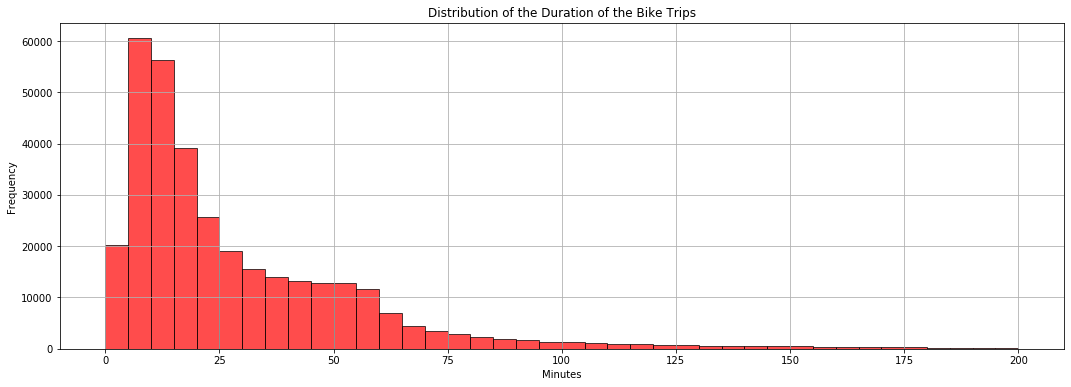

In [60]:
#Vytvoříme histogram 
# Pro počet koší vyberu intervaly po 5ti minutach.
fig, ax = plt.subplots(figsize=(18,6))
ax.hist(duration_hist.values, bins=np.linspace(0,200,41).astype(int), edgecolor='black',color='r', alpha = 0.7)
plt.title('Distribution of the Duration of the Bike Trips')
plt.grid()
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

**Z histogramu je patrné, že nejvíce zastoupené intervaly trvání cest je do 10ti a do 15ti minut.**

# 8 Vývoj poptávky po půjčování kol v čase

In [61]:
#Počítám počet cest za den
df_demand = df.loc[:,['started_at']]
df_demand.index = df_demand['started_at']
df_demand.rename(columns = {'started_at' : 'frequency'}, inplace= True)
df_demand_day = df_demand.resample('D').count()
df_demand_day.head()

,frequency
started_at,
2018-09-15,3
2018-09-16,10
2018-09-17,403
2018-09-18,126
2018-09-19,77


In [62]:
#Jsou datumy, kdy nedošlo k žádné vypůjčce. Vždy je to na konci roku. 
condition_zero = df_demand_day['frequency'] == 0
df_demand_day[condition_zero]

,frequency
started_at,
2018-10-31,0
2018-11-30,0
2018-12-31,0
2019-01-31,0
2019-04-30,0
2019-05-31,0
2019-06-30,0
2019-07-31,0
2019-08-31,0


In [63]:
# Odstraním datumy kdy nejsou cesty.
df_demand_day = df_demand_day[df_demand_day['frequency'] != 0]
df_demand_day

,frequency
started_at,
2018-09-15,3
2018-09-16,10
2018-09-17,403
2018-09-18,126
2018-09-19,77
...,...
2020-10-26,560
2020-10-27,437
2020-10-28,559


In [64]:
#Vytvořím kopii df o denní poptávce, kterou použiji, až budu zkoumat vliv počasí
df_demand_day_w = df_demand_day.copy()

## 8.1 Vývoj denní poptávky

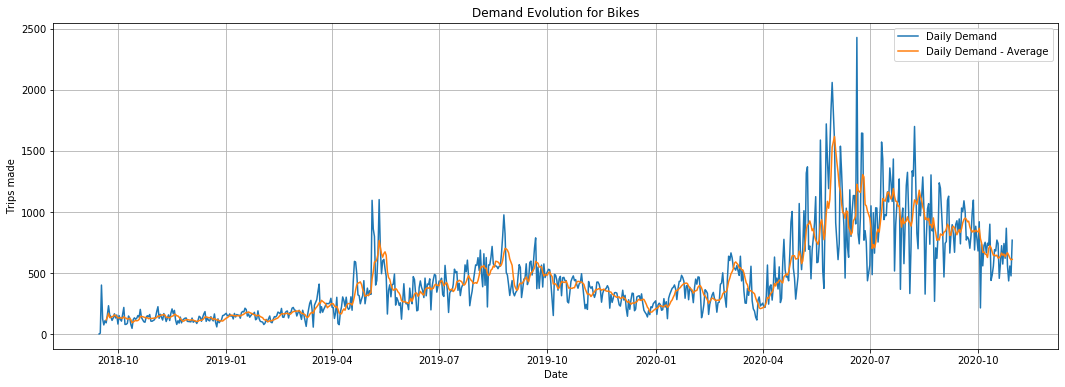

In [65]:
#Vývoj denní poptávky vč. kl.průměru
df_demand_day['rolling_7'] = df_demand_day.rolling(7).mean()
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df_demand_day['frequency'], label = 'Daily Demand')
ax.plot(df_demand_day['rolling_7'], label = 'Daily Demand - Average')
plt.title('Demand Evolution for Bikes')
plt.xlabel('Date')
plt.ylabel('Trips made')
plt.legend()
plt.grid()
plt.show()


**Vývoj poptávky po dnech. Graf zahrnuje také klouzavý tydenní průměr, neboť v grafu je patrné kolisání**

## 8.2 Vývoj měsiční poptávky

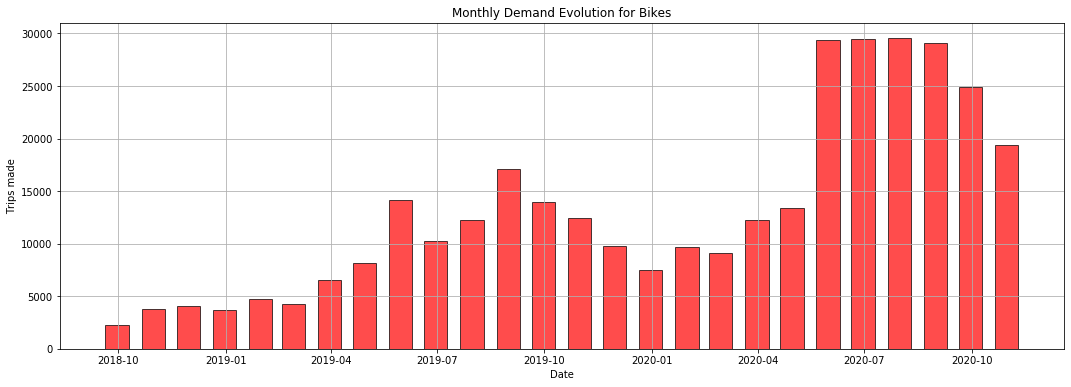

In [66]:
#Vývoj měsiční poptávky
df_demand_month = df_demand.resample('M').count()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(df_demand_month.index, height=df_demand_month['frequency'], width=20, color= 'red', alpha=0.7, edgecolor='black')
plt.title('Monthly Demand Evolution for Bikes')
plt.xlabel('Date')
plt.ylabel('Trips made')
plt.grid()
plt.show()

**Z grafu vyplývá, že poptávka obecně je vyšší od dubna do září. Od října opět klesá.
Obecně popularita kol byla v roce 2020 vyšší.** 

**V měsících července a srpna 2019 byla poptávka nižší oproti červnu a září stejného roku. Může to být způsobeno tím, že jsou hlavní letní měsíce, tak občané Edinburghu nejsou ve městě.**

**Takové klesání v roce 2020 nebylo, což by mohlo znamenat, že z důvodu pandemie více místních občanů se rozhodlo necestovat.**

# 9. Vliv počasí

In [67]:
df_weather = pd.read_csv('data_edinburgh/edinburgh_weather.csv',parse_dates=True)
df_weather.head()

,time,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,date
0,00:00,11 °c,11 °c,9 km/h from S,19 km/h,0.0 mm,79%,13%,1020 mb,Excellent,2018-09-01
1,03:00,13 °c,12 °c,11 km/h from SSW,19 km/h,0.0 mm,76%,96%,1020 mb,Excellent,2018-09-01
2,06:00,14 °c,13 °c,11 km/h from SSW,19 km/h,0.0 mm,84%,100%,1020 mb,Excellent,2018-09-01
3,09:00,14 °c,13 °c,14 km/h from SSW,23 km/h,0.1 mm,88%,78%,1021 mb,Excellent,2018-09-01
4,12:00,16 °c,16 °c,15 km/h from SSW,22 km/h,0.0 mm,87%,87%,1021 mb,Excellent,2018-09-01


In [68]:
#Kontrola data type u weather df
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      6336 non-null   object
 1   temp      6336 non-null   object
 2   feels     6336 non-null   object
 3   wind      6336 non-null   object
 4   gust      6336 non-null   object
 5   rain      6336 non-null   object
 6   humidity  6336 non-null   object
 7   cloud     6336 non-null   object
 8   pressure  6336 non-null   object
 9   vis       6336 non-null   object
 10  date      6336 non-null   object
dtypes: object(11)
memory usage: 544.6+ KB


In [69]:
#Upravime tabulku weather. U sloupcu rain, temp, feels odstraním text a přeměním na čísla
df_weather['rain'] = df_weather['rain'].str.rstrip(' mm').astype('float')
df_weather['temp'] = df_weather['temp'].str.rstrip(' °c').astype('int64')
df_weather['feels'] = df_weather['feels'].str.rstrip(' °c').astype('int64')

In [70]:
df_weather['date'] = df_weather['date'].astype('datetime64')

In [71]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      6336 non-null   object        
 1   temp      6336 non-null   int64         
 2   feels     6336 non-null   int64         
 3   wind      6336 non-null   object        
 4   gust      6336 non-null   object        
 5   rain      6336 non-null   float64       
 6   humidity  6336 non-null   object        
 7   cloud     6336 non-null   object        
 8   pressure  6336 non-null   object        
 9   vis       6336 non-null   object        
 10  date      6336 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 544.6+ KB


In [72]:
df_weather.tail()

,time,temp,feels,wind,gust,rain,humidity,cloud,pressure,vis,date
6331,09:00,14,12,21 km/h from SSE,33 km/h,0.4,86%,100%,993 mb,Poor,2020-10-31
6332,12:00,14,12,24 km/h from SSE,37 km/h,0.4,88%,94%,987 mb,Poor,2020-10-31
6333,15:00,10,6,42 km/h from SW,55 km/h,0.5,75%,100%,989 mb,Excellent,2020-10-31
6334,18:00,9,5,38 km/h from WSW,54 km/h,0.0,76%,79%,994 mb,Excellent,2020-10-31
6335,21:00,8,4,36 km/h from SW,49 km/h,0.1,74%,79%,997 mb,Excellent,2020-10-31


In [73]:
#Vytvořím df s daty o počasí, které mě zajímají a v denních časech, neboť se kola půjčují hlavně během dne.
conditionweather = df_weather['time'].isin(['06:00','09:00','12:00','15:00','18:00'])
df_weather_day = df_weather.loc[conditionweather,['temp','feels', 'rain','date']].groupby('date').agg({'temp':'mean','feels':'mean','rain':'sum'}).round(2)
df_weather_day.head()

,temp,feels,rain
date,,,
2018-09-01,15.4,15.0,0.1
2018-09-02,18.0,18.2,0.1
2018-09-03,11.8,11.6,0.2
2018-09-04,12.8,15.4,0.0
2018-09-05,14.0,14.0,0.0


In [74]:
df_weather_day.index

DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04',
               '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08',
               '2018-09-09', '2018-09-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='date', length=792, freq=None)

In [75]:
#Spojím df o pčasí s df o denní poptávce. Použiji left join, protože mě zajímají pouze datumy df o denní poptávce
df_demand_weather = df_demand_day_w.merge(df_weather_day, how = 'left', left_index=True, right_index=True)
df_demand_weather.head()

,frequency,temp,feels,rain
started_at,,,,
2018-09-15,3,11.6,10.0,0.0
2018-09-16,10,13.4,11.0,0.2
2018-09-17,403,14.6,14.0,0.1
2018-09-18,126,14.2,13.8,1.7
2018-09-19,77,12.0,8.8,2.9


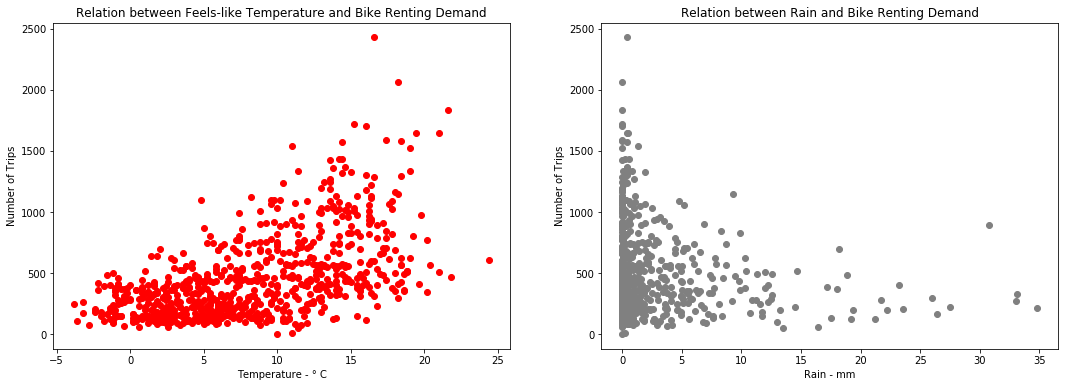

In [76]:
#Pomocí bodového grafu zkoumáme vztah mezi pocitovanou teplotou a poptávkou
fig, axes = plt.subplots(1,2, figsize=(18,6))
(ax1, ax2) = axes
ax1.scatter(x= 'feels', y = 'frequency', data = df_demand_weather, color = 'red')
ax1.set_title('Relation between Feels-like Temperature and Bike Renting Demand')
ax1.set_ylabel('Number of Trips')
ax1.set_xlabel('Temperature - ° C')
ax2.scatter(x= 'rain', y = 'frequency', data = df_demand_weather, color = 'grey')
ax2.set_title('Relation between Rain and Bike Renting Demand')
ax2.set_ylabel('Number of Trips')
ax2.set_xlabel('Rain - mm')
plt.show()

**Je patrné určitý vztah mezi pocitovanou teplotou a poptávkou, ale i při hezkém počasí (+15) jsou také nízké hodnoty.
Takže jsou i další faktory, např. pracovní den/víkend, sražky**

**Je patrné určitý vztah mezi sražkami a poptávkou. Nejvyšší hodnoty jsou, když jsou sražky okolo nuly.
Jsou však také případy, kdy byla denní poptávka okolo průměru a přitom byly sražky. To může být dano, že sražky byly narazové, ale zbytek dne bylo přijemně.**

## 9.1 Příklad vlivu počasí v lednu 2020

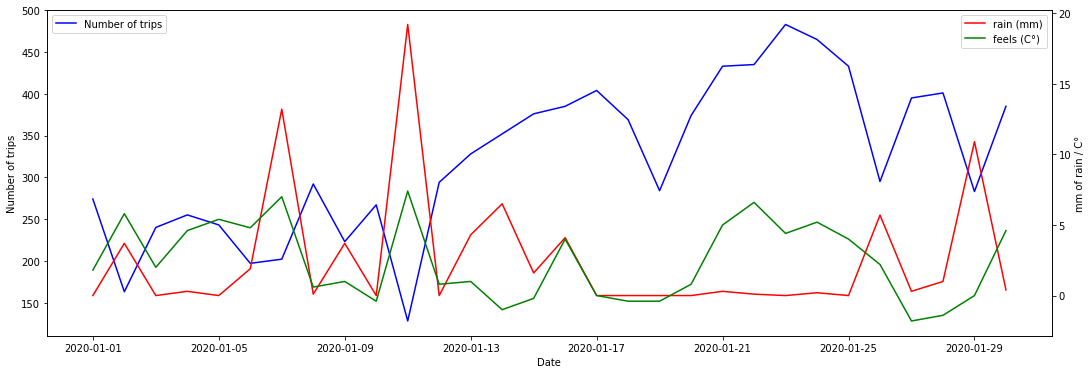

In [77]:
#Pro znazornění. V sobotu 11. ledna, sražky byly silné, tak poptávka propadla
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.plot(df_demand_weather.loc['2020-01-01' : '2020-01-31','frequency'], label='Number of trips', color='blue')
#ax1.legend()
ax1.legend(loc=2)
plt.xlabel('Date')
ax1.set_ylabel('Number of trips')
ax2 = ax1.twinx()
ax2.plot(df_demand_weather.loc['2020-01-01' : '2020-01-31','rain'], label='rain (mm)', color='red')
ax2.plot(df_demand_weather.loc['2020-01-01' : '2020-01-31','feels'], label='feels (C°)', color='green')
ax2.set_ylabel('mm of rain / C°')
ax2.legend()
plt.show()

## 9.2 Příklad vlivu počasí v červenci 2020

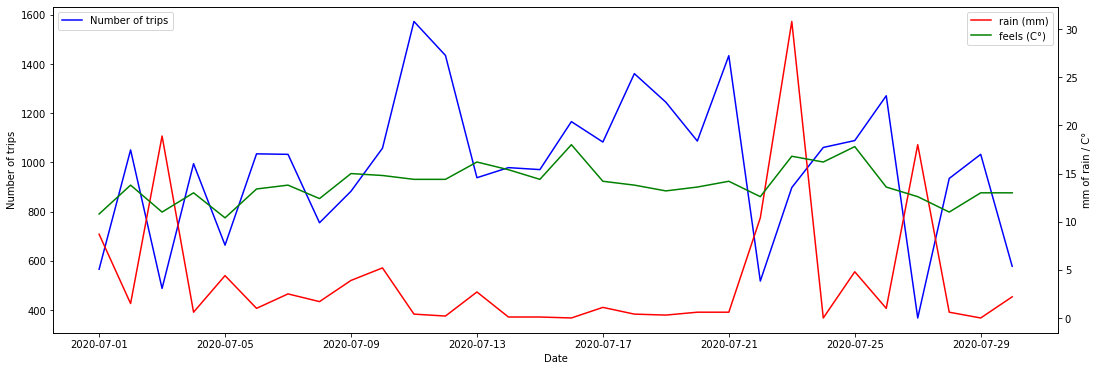

In [78]:
#Pro znazornění. 
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.plot(df_demand_weather.loc['2020-07-01' : '2020-07-30','frequency'], label='Number of trips', color='blue')
#ax1.legend()
ax1.legend(loc=2)
plt.xlabel('Date')
ax1.set_ylabel('Number of trips')
ax2 = ax1.twinx()
ax2.plot(df_demand_weather.loc['2020-07-01' : '2020-07-30','rain'], label='rain (mm)', color='red')
ax2.plot(df_demand_weather.loc['2020-07-01' : '2020-07-30','feels'], label='feels (C°)', color='green')
ax2.set_ylabel('mm of rain / C°')
ax2.legend()
plt.show()

# 10 Závěr

- Data nejsou uplná. Chybí informace pro několik dní, vždy na konci měsíce (8)
- Trvání některých cest není reálné (7)
- Umístění jedné stanice je nepravděpodobné, neboť se nachází cca. 280 kilometrů od zbytku (6) 
- Ze 200 stanic lze 50 považovat za neaktivní, neboť jejiych využití je pod 25. percentilem. (4)
- Nejčetnější jsou cesty, které trvají do 10ti nebo do 15ti minut (7)
- Rekreační okružní cesty kde start station a end station jsou stejné reprezentují 6,7% všech cest (3.4)
- Všech 10 nejpouživaných stanic trpí, že buď se tam kola hromadí nebo mohou chybět. Hodnoty medianu a průměru však nejsou tak alarmující, aby se musel zařidit pravidelný systém převozu kol. Navíc množství kol, které se hromadí nebo potenciálně chybí není konstantní a spíše kolisá. (5.3.1 a 5.3.2)
- Důvody kolisání může být jednak pracovní den vs. víkend a jednak vliv počasí, převážně deště. (8.1 a 9)
- Když se podíváme na denní průměr hromáždění nebo nedostatku kol u jednotlivých stanic, vidíme, že hodnoty nejsou přiliš odlišné od těch z nejpopulárnějších stanic. Jinými slovy, problém hromáždění nebo nedostatku kol u dalších stanic není horší než u nejpopulárnějších. (5.3.3)
- Zároveň, když studujeme ukazatele romáždění nebo nedostatku kol pouze pro rok 2020, zjistíme, že nejsou tak odlišné jako od dat pro celé studované období, což lze interpretovat tak, že se situace nezhoršila větší poptávkou, neboť poptávka po kolech byla v roce 2020 vyšší. (5.3.3 a 8.2)
- Lepším řešením by mohl být systém odměn pro uživatele, aby kolo umístili ve stanicích méně obsasených, popř. zvyšit cenu za parkování kola v určitých stanicích, v některých časech nebo dnech.
- Data ukazují, že průměrná minimální vzdalenost mezi dvěma stanicemi je 162 metrů. Median je 54 metrů. To znamená, že je šance, aby nejbližší alternativní stanice byla v přijatelné vzdalenosti pro uživatele.(6)